# Doublespike Correction

Isopy contains functions

In [1]:
import isopy
import numpy as np
import matplotlib.pyplot as plt

spike = isopy.array([0, 1, 1, 0], ['104pd', '106pd', '108pd', '110pd'])
sample = isopy.tb.make_ms_sample('pd', spike_mixture=spike, fnat = 0.1, fins=1.6)
result = isopy.tb.ds_inversion(sample, spike) #Performes the inversion individually on each measurement

np.mean(result) #we can use array functions on the result object

DSResult(method = "rudge",
alpha = -0.09989525945107548,
beta = 1.6001120511554234,
lambda_ = 0.5839595216533863,
fnat = 0.09989525945107548,
fins = 1.6001120511554234,
spike_fraction = 0.4999987778133569,
sample_fraction = 0.5000012221866431,
Q = 1.0000048897557263)

c:\users\matti\dropbox\python\isopy\isopy\toolbox\plotting.py:1263: RuntimeWarning: All-NaN axis encountered
  wstart = np.nanmax([wstart, _axes_data_func(ax, waxis, np.nanmax, default_value=np.nan)])


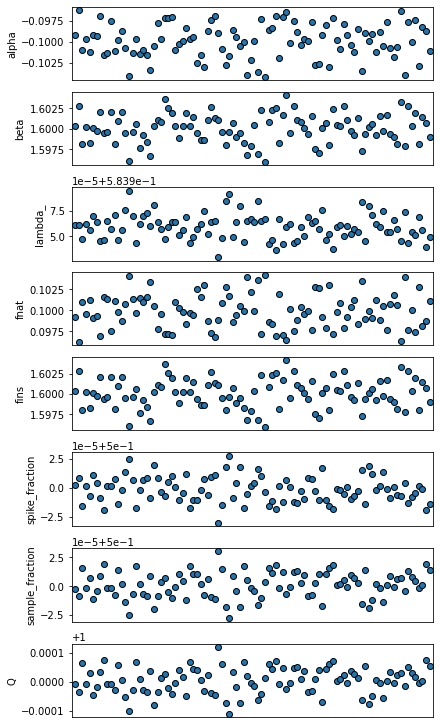

In [2]:
isopy.tb.plot_hstack(plt, result, figure_height=10)

Isopy also contains the function ``ds_correction`` that will apply an iterative correction for isobaric interferences.
You can have a look at the [source code](https://isopy.readthedocs.io/en/latest/_modules/isopy/toolbox/doublespike.html#ds_correction) to see the implementation.

In [5]:
spike = isopy.array([0, 1, 1, 0], ['104pd', '106pd', '108pd', '110pd'])
sample = isopy.tb.make_ms_sample('pd', spike_mixture=spike, fnat = 0.1, fins=1.6, ru101=0.1) 

result = isopy.tb.ds_correction(sample, spike) 
np.mean(result)

DSResult(method = "rudge",
alpha = -0.1001415163397575,
beta = 1.5999369082944488,
lambda_ = 0.5839608266801193,
fnat = 0.1001415163397575,
fins = 1.5999369082944488,
spike_fraction = 0.4999995425716849,
sample_fraction = 0.5000004574283151,
Q = 1.0000018310190562)

In [6]:
result = isopy.tb.ds_inversion(sample, spike)
np.mean(result)

DSResult(method = "rudge",
alpha = 5.285478055413437,
beta = 4.066267584335314,
lambda_ = 0.5363846122598621,
fnat = -5.285478055413437,
fins = 4.066267584335314,
spike_fraction = 0.46331972074443983,
sample_fraction = 0.5366802792555602,
Q = 1.1583367943126277)

# Example of a double spike correction

In [1]:
import isopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
array1 = isopy.array([[1,2,3], [4,5,6]], ('pd105', 'pd106', 'pd108'))
array2 = isopy.array([0.5, 1, 1.5], ('pd105', 'pd106', 'pd108'))
array1 * array2

(row) , 105Pd   , 106Pd   , 108Pd   
0     , 0.50000 , 2.00000 , 4.50000 
1     , 2.00000 , 5.00000 , 9.00000 

#### Define the our spike

In [3]:
spike = isopy.zeros(None, ('104pd', '106pd', '108pd', '110pd'))
spike['106pd'] = 1
spike['110pd'] = 1
spike

(row) , 104Pd   , 106Pd   , 108Pd   , 110Pd   
None  , 0.00000 , 1.00000 , 0.00000 , 1.00000 

#### Synthesise some analyses

In [4]:
blank = isopy.tb.make_ms_sample('pd', maxv=0.1, fins=1.6, ru101=0.0001)
bracket1 = isopy.tb.make_ms_sample('pd', spike_mixture = spike, maxv=10, fnat=-0.09, fins=1.6, ru101=0.0001)
bracket2 = isopy.tb.make_ms_sample('pd', spike_mixture = spike, maxv=10, fnat=-0.11, fins=1.6, ru101=0.0001)
sample = isopy.tb.make_ms_sample('pd', spike_mixture = spike, maxv=10, fins=1.6, fnat=0.1, ru101=0.01)
sample_name = 'example'

#### Calculate the average blank value

c:\users\matti\dropbox\python\isopy\isopy\toolbox\plotting.py:1245: RuntimeWarning: All-NaN axis encountered
  wstart = np.nanmax([wstart, _axes_data_func(ax, waxis, np.nanmax, default_value=np.nan)])


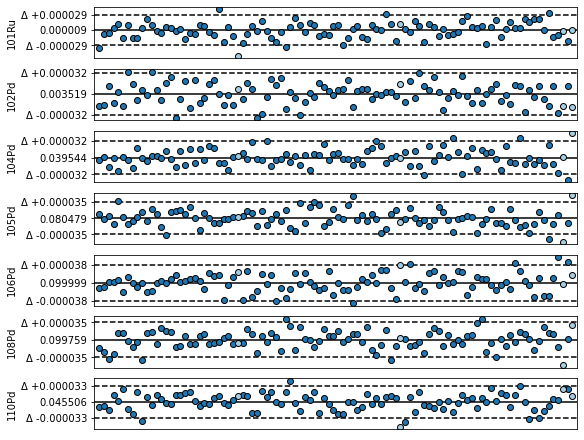

In [5]:
blank_r = blank.ratio()
blank_outliers = isopy.tb.find_outliers(blank, axis=1)
blank_accepted = np.invert(blank_outliers)
blank_avg = np.mean(blank[blank_accepted])

figure = isopy.tb.update_figure(plt, figheight=6, figwidth=8)
isopy.tb.plot_hstack(plt, blank, outliers=blank_outliers, color=isopy.tb.ColorPairs[0])
isopy.tb.plot_hcompare(figure)

#### Calculate *fnat* for the bracketing standards

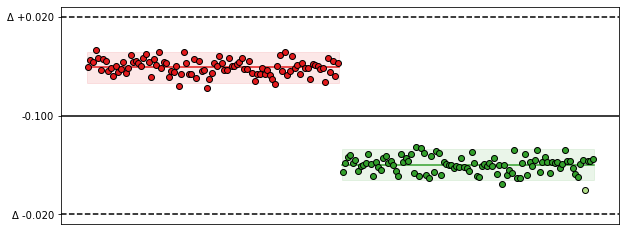

In [6]:
bracket1_result = isopy.tb.ds_correction(bracket1, spike)
bracket1_fnat = bracket1_result.fnat

bracket1_outliers = isopy.tb.find_outliers(bracket1_fnat)
bracket1_accepted = np.invert(bracket1_outliers)
bracket1_fnat_avg = np.mean(bracket1_fnat[bracket1_accepted])

bracket2_result = isopy.tb.ds_correction(bracket2, spike)
bracket2_fnat = bracket2_result.fnat

bracket2_outliers = isopy.tb.find_outliers(bracket2_fnat)
bracket2_accepted = np.invert(bracket2_outliers)
bracket2_fnat_avg = np.mean(bracket2_fnat[bracket2_accepted])

isopy.tb.update_figure(plt, figwidth=10)
isopy.tb.plot_hstack(plt, bracket1_fnat, outliers=bracket1_outliers, cval=True, pmval=True, color=isopy.tb.ColorPairs[1])
isopy.tb.plot_hstack(plt, bracket2_fnat, outliers=bracket2_outliers, cval=True, pmval=True, color=isopy.tb.ColorPairs[2])
isopy.tb.plot_hcompare(plt)

#### Calculate the bracketing *fnat* mean


In [7]:
bracket_fnat_avg = np.mean([bracket1_fnat_avg, bracket2_fnat_avg])
bracket_fnat_avg

-0.09987735182012025

#### Calculate our sample

Wall time: 218 ms


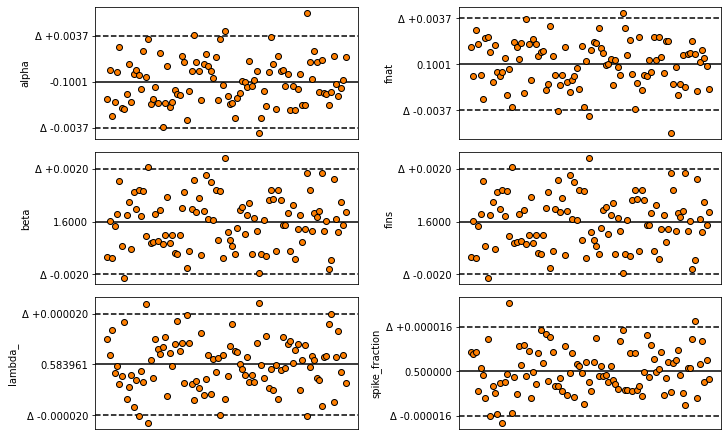

In [10]:
sample_blk = sample #- blank_avg
%time sample_result = isopy.tb.ds_correction(sample_blk, spike, method='rudge')
#sample_result = isopy.tb.ds_inversion(sample, spike)
sample_outliers = isopy.tb.find_outliers(sample_result.fnat)


layout = list(zip(sample_result.keys()[:3], sample_result.keys()[3:]))
axes = isopy.tb.create_subplots(plt, layout, figwidth=10, figheight=6)
for attr in axes:
    ax = axes[attr]
    isopy.tb.plot_hstack(ax, getattr(sample_result, attr), outliers=sample_outliers, color=isopy.tb.ColorPairs[3])
    isopy.tb.plot_hcompare(ax)
    ax.set_ylabel(attr)

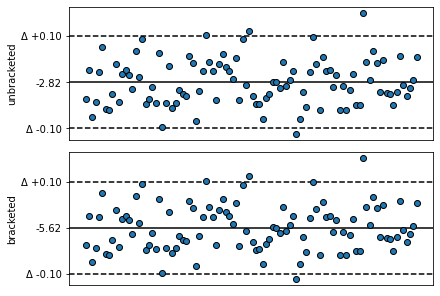

In [11]:
axes = isopy.tb.create_subplots(plt, [['top'], ['bottom']])

sample_delta = isopy.tb.ds_Delta('pd105/pd108', sample_result, 0, 1000)
isopy.tb.plot_hstack(axes['top'], sample_delta, outliers=sample_outliers, color=isopy.tb.ColorPairs[6])
axes['top'].set_ylabel('unbracketed')

sample_delta = isopy.tb.ds_Delta('pd105/pd108', sample_result, bracket_fnat_avg, 1000)
isopy.tb.plot_hstack(axes['bottom'], sample_delta, outliers=sample_outliers, color=isopy.tb.ColorPairs[6])
axes['bottom'].set_ylabel('bracketed')
isopy.tb.plot_hcompare(axes)